In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

In [2]:
df = pd.read_csv('AAPL.csv')  # Load Dataset
df.info()
df.head()
# Statistical summary of the data
df.describe()
# Check for missing values
df.isnull().sum()
# Check for duplicate rows
df.duplicated().sum()
# Drop duplicate rows
df.drop_duplicates(inplace=True)
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10468 entries, 0 to 10467
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10468 non-null  object 
 1   Open       10468 non-null  float64
 2   High       10468 non-null  float64
 3   Low        10468 non-null  float64
 4   Close      10468 non-null  float64
 5   Adj Close  10468 non-null  float64
 6   Volume     10468 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 572.6+ KB


In [3]:

def add_features(data):
    data['day_of_week'] = data['Date'].dt.dayofweek
    data['month'] = data['Date'].dt.month
    data['quarter'] = data['Date'].dt.quarter
    data['year'] = data['Date'].dt.year
    data['week_of_year'] = data['Date'].dt.isocalendar().week
    data['day_of_year'] = data['Date'].dt.dayofyear
    data['lag_1'] = data['Close'].shift(1)
    data['lag_2'] = data['Close'].shift(2)
    data['lag_3'] = data['Close'].shift(3)
    data['lag_4'] = data['Close'].shift(4)
    data['lag_5'] = data['Close'].shift(5)
    return data

df = add_features(df)
df.dropna(inplace=True)

<Figure size 1000x600 with 0 Axes>

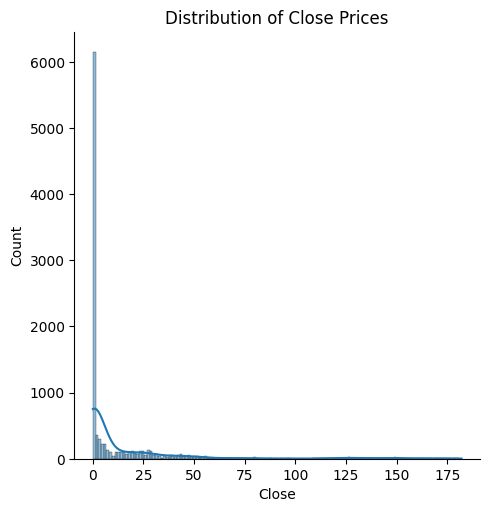

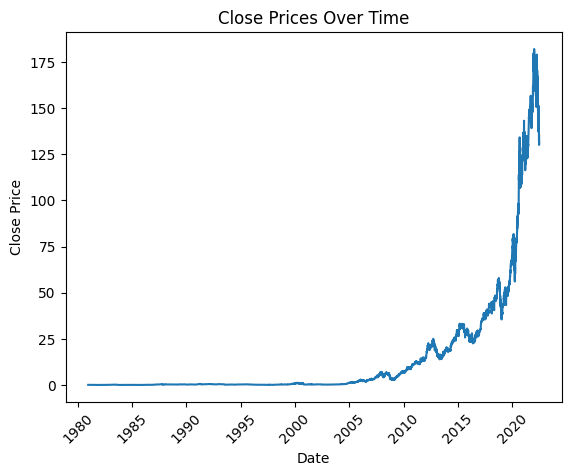

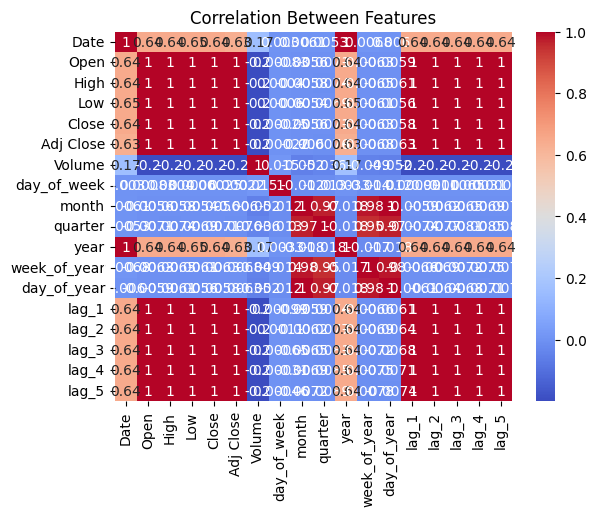

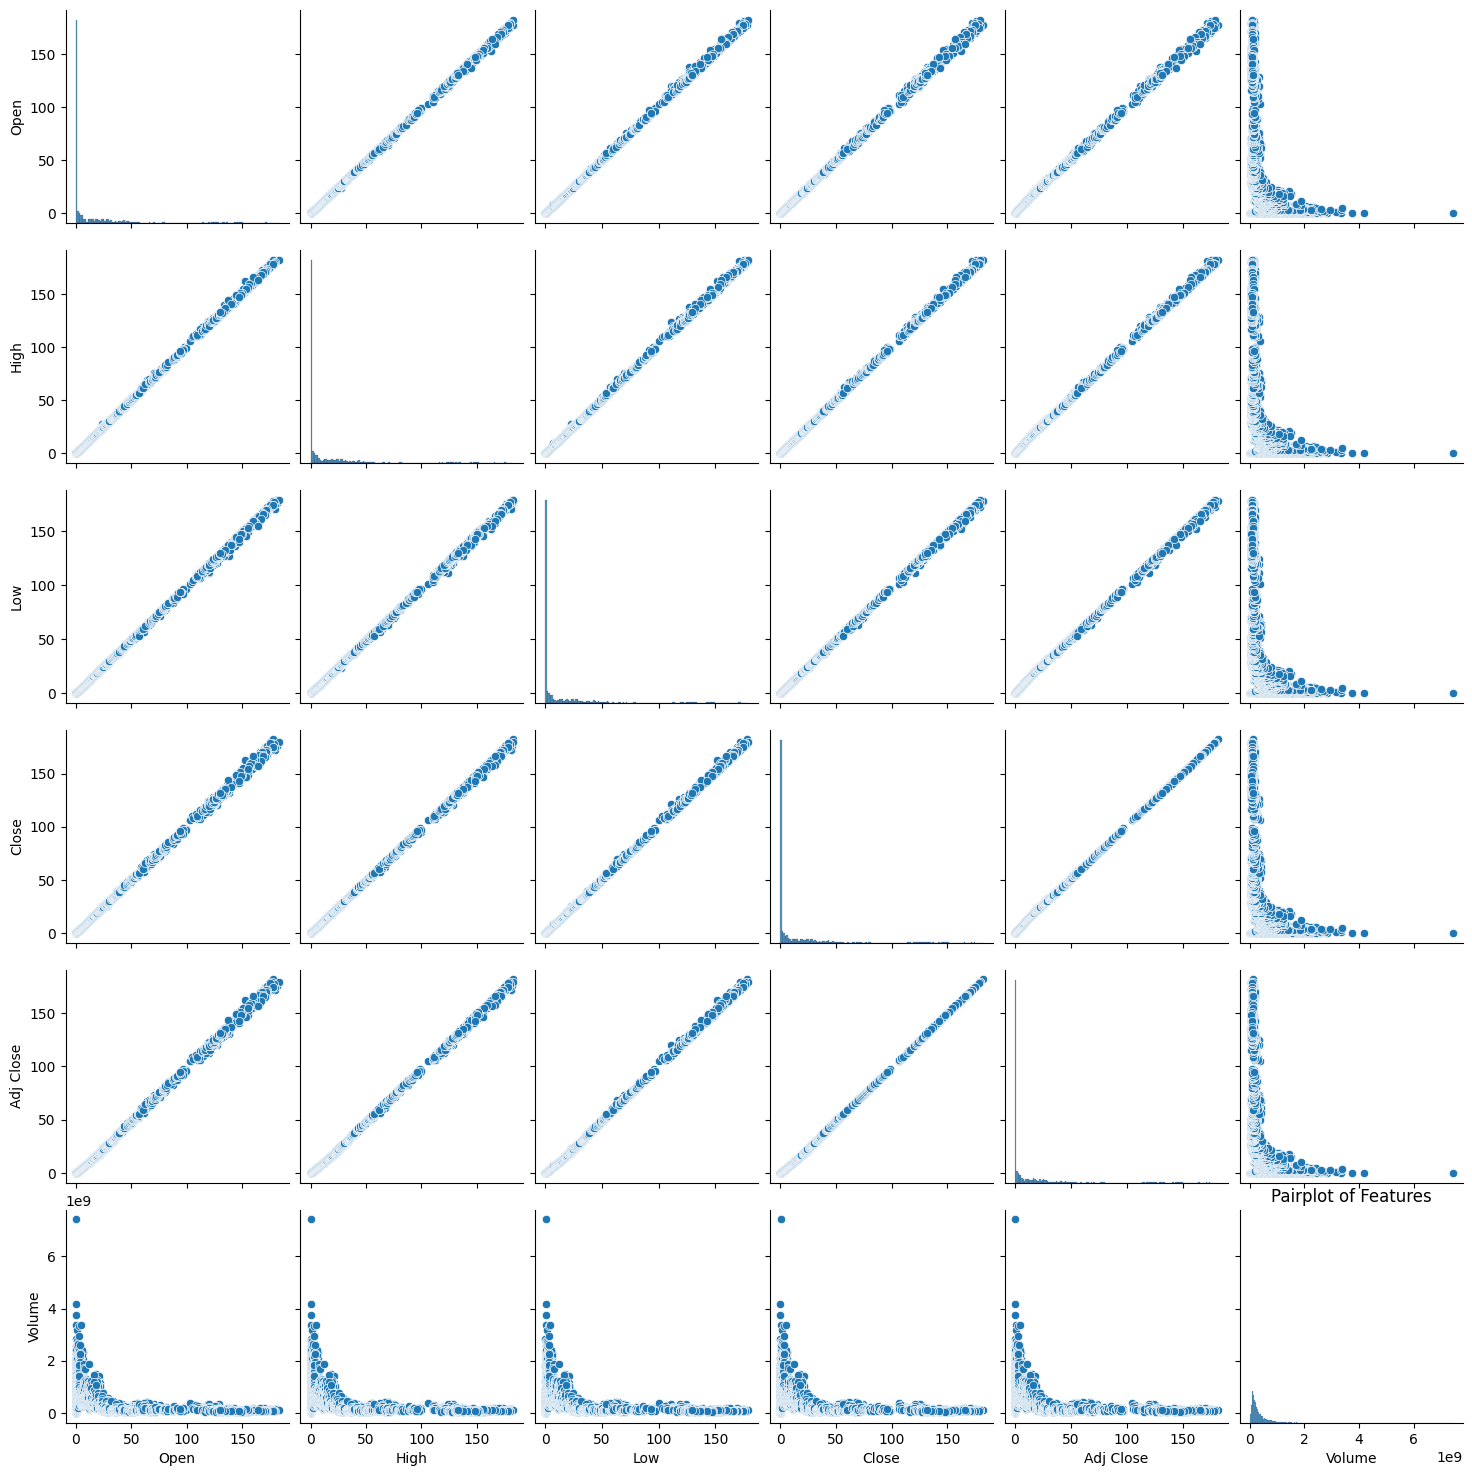

In [4]:

import seaborn as sns
plt.figure(figsize=(10, 6))

# Distribution of the target variable
sns.displot(data=df, x='Close', kde=True)
plt.title('Distribution of Close Prices')
plt.show()

# Line plot of close prices over time
sns.lineplot(data=df, x='Date', y='Close')
plt.title('Close Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(rotation=45)
plt.show()

# Heatmap of correlation between features
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.title('Correlation Between Features')
plt.show()

# Pairplot of features
sns.pairplot(data=df, vars=['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'])
plt.title('Pairplot of Features')
plt.show()

In [5]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[['Open', 'High', 'Low', 'Volume']], df['Close'], test_size=0.2, random_state=42)

# Baseline model
y_pred_baseline = np.full((len(y_test),), y_train.mean())
mse_baseline = mean_squared_error(y_test, y_pred_baseline)
rmse_baseline = np.sqrt(mse_baseline)
mae_baseline = mean_absolute_error(y_test, y_pred_baseline)
mape_baseline = np.mean(np.abs((y_test - y_pred_baseline) / y_test)) * 100
r2_baseline = r2_score(y_test, y_pred_baseline)

print('Baseline Model:')
print(f'MSE: {mse_baseline:.2f}')
print(f'RMSE: {rmse_baseline:.2f}')
print(f'MAE: {mae_baseline:.2f}')
print(f'MAPE: {mape_baseline:.2f}%')
print(f'R2 Score: {r2_baseline:.2f}\n')

Baseline Model:
MSE: 965.91
RMSE: 31.08
MAE: 19.45
MAPE: 4091.21%
R2 Score: -0.00



In [6]:
# Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mape_lr = np.mean(np.abs((y_test - y_pred_lr) / y_test)) * 100
r2_lr = r2_score(y_test, y_pred_lr)

print('Linear Regression Model:')
print(f'MSE: {mse_lr:.2f}')
print(f'RMSE: {rmse_lr:.2f}')
print(f'MAE: {mae_lr:.2f}')
print(f'MAPE: {mape_lr:.2f}%')
print(f'R2 Score: {r2_lr:.2f}\n')

Linear Regression Model:
MSE: 0.06
RMSE: 0.25
MAE: 0.07
MAPE: 0.81%
R2 Score: 1.00



In [7]:
# Support Vector Regression Model
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svr_model = SVR(kernel='linear')
svr_model.fit(X_train_scaled, y_train)
y_pred_svr = svr_model.predict(X_test_scaled)
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)
mae_svr = mean_absolute_error(y_test, y_pred_svr)
mape_svr = np.mean(np.abs((y_test - y_pred_svr) / y_test)) * 100
r2_svr = r2_score(y_test, y_pred_svr)

print('Support Vector Regression Model:')
print(f'MSE: {mse_svr:.2f}')
print(f'RMSE: {rmse_svr:.2f}')
print(f'MAE: {mae_svr:.2f}')
print(f'MAPE: {mape_svr:.2f}%')
print(f'R2 Score: {r2_svr:.2f}\n')

Support Vector Regression Model:
MSE: 0.17
RMSE: 0.41
MAE: 0.16
MAPE: 21.41%
R2 Score: 1.00



In [8]:

# Random Forest Regression Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mape_rf = np.mean(np.abs((y_test - y_pred_rf) / y_test)) * 100
r2_rf = r2_score(y_test, y_pred_rf)

print('Random Forest Regression Model:')
print(f'MSE: {mse_rf:.2f}')
print(f'RMSE: {rmse_rf:.2f}')
print(f'MAE: {mae_rf:.2f}')
print(f'MAPE: {mape_rf:.2f}%')
print(f'R2 Score: {r2_rf:.2f}\n')

Random Forest Regression Model:
MSE: 0.13
RMSE: 0.36
MAE: 0.10
MAPE: 0.87%
R2 Score: 1.00



In [9]:
# LSTM Model
# Create a new dataframe with only the 'Close' column
data = df.filter(['Close'])
dataset = data.values
len_train_data = int(np.ceil(len(dataset) * .95))

# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
trained_scaled_data = scaler.fit_transform(dataset)

# Create the training data set
train_data = trained_scaled_data[0:int(len_train_data), :]
x_train = []
y_train = []

In [10]:

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Convert to tensors
x_train = torch.tensor(x_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)

In [11]:
class LSTMModel(nn.Module):
    def __init__(self):
        super(LSTMModel, self).__init__()
        self.lstm1 = nn.LSTM(1, 128, batch_first=True)
        self.lstm2 = nn.LSTM(128, 64, batch_first=True)
        self.fc1 = nn.Linear(64, 25)
        self.fc2 = nn.Linear(25, 1)

    def forward(self, x):
        x, _ = self.lstm1(x)
        x, _ = self.lstm2(x)
        x = x[:, -1, :]
        x = self.fc1(x)
        x = self.fc2(x)
        return x

model = LSTMModel()

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 14
batch_size = 32
train_loader = DataLoader(TensorDataset(x_train, y_train), batch_size=batch_size, shuffle=True)

In [12]:
for epoch in range(epochs):
    for x_batch, y_batch in train_loader:
        optimizer.zero_grad()
        y_pred = model(x_batch)
        loss = criterion(y_pred.squeeze(), y_batch)
        loss.backward()
        optimizer.step()

# Prepare the testing data
test_data = trained_scaled_data[len_train_data - 60:, :]
x_test = []

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_test = torch.tensor(x_test, dtype=torch.float32)

# Make predictions
model.eval()
with torch.no_grad():
    predictions = model(x_test)
predictions = predictions.detach().numpy()
predictions = scaler.inverse_transform(predictions)

C:\Users\Swarup\AppData\Local\Temp\ipykernel_7348\825974861.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


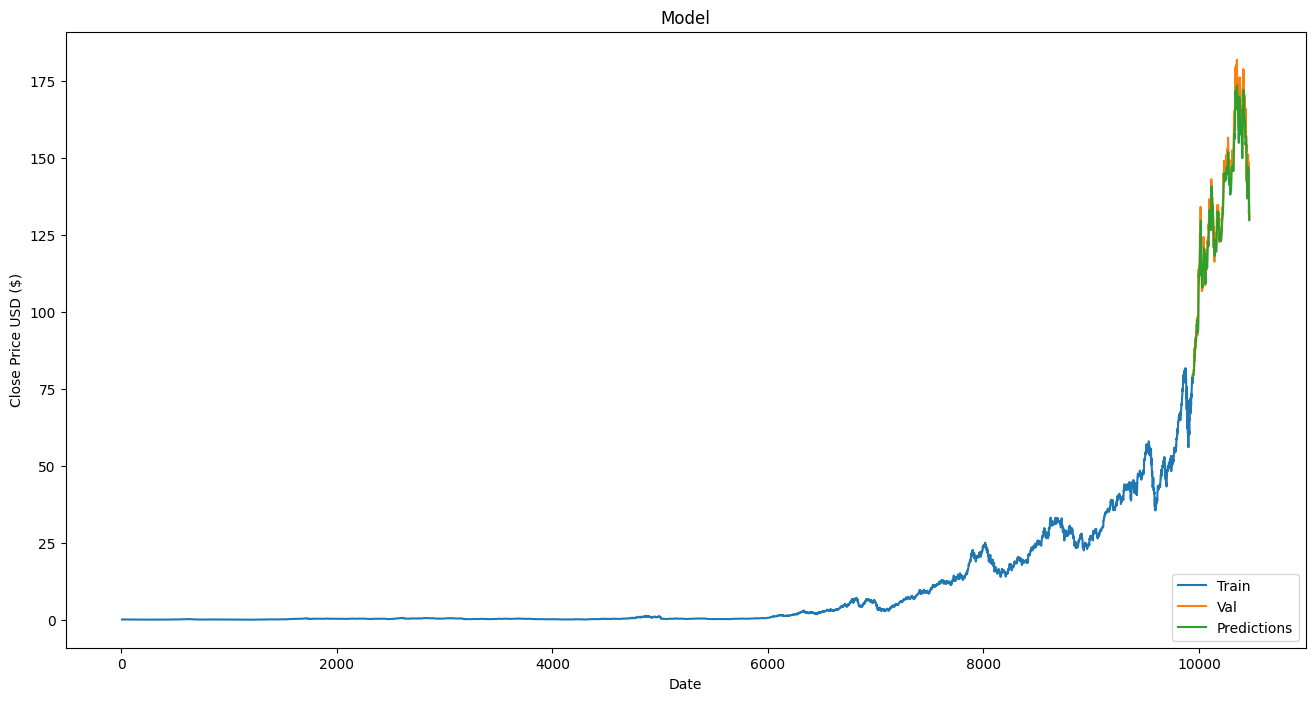

In [13]:
# Plot the data
train = data[:len_train_data]
valid = data[len_train_data:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()